In [48]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [7]:
def load_data(path):
    with open(path, 'rb') as i_:
        return pickle.load(i_)

data = load_data('../data/shred/chabudai_kaeshi_2_5.pkl')

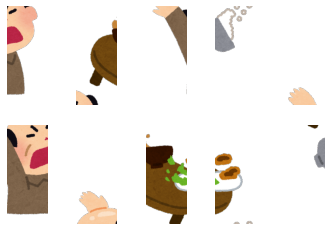

In [8]:
def show(images, rows, cols):
    fig = plt.figure()
    for i, image in enumerate(images):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.axis('off')
        ax.imshow(image)
    fig.show()

show(data.images, data.rows, data.cols)

In [39]:
def sim1(up, down):
    shape = np.min((up.shape, down.shape), axis=0)
    return (up[-1, :shape[1]] == down[0, :shape[1]]).sum()

def sim2(left, right):
    shape = np.min((left.shape, right.shape), axis=0)
    return (left[:shape[0], -1] == right[:shape[0], 0]).sum()

print(sim1(data.images[0], data.images[1]))
print(sim2(data.images[0], data.images[1]))

640
1324


In [56]:
def get_coeff(images, rows, cols):
    n = len(images)
    coeff = np.zeros((n, n, rows, cols, rows, cols))
    for a in range(n):
        for b in range(n):
            for row in range(rows):
                for col in range(cols):
                    if row < rows - 1:
                        coeff[a, b, row, col, row + 1, col] = sim1(images[a], images[b])
                    if col < cols - 1:
                        coeff[a, b, row, col, row, col + 1] = sim1(images[a], images[b])
    return coeff

coeff = get_coeff(data.images, data.rows, data.cols)

In [86]:
292.0*x[0, 0, 0]*x[0,0,0]

Binary(x[0][0][0])*Num(292.000000)*Binary(x[0][0][0])

In [135]:
import pyqubo

x = pyqubo.Array.create('x', shape=(data.size, data.rows, data.cols), vartype='BINARY')

cost = 0
M = 2000
for a in range(data.size):
    for b in range(data.size):
        for row in range(data.rows):
            for col in range(data.cols):
                if row < data.rows - 1:
                    s = sim1(data.images[a], data.images[b])
                    if s != 0:
                        cost -= s*x[a, row, col]*x[b, row + 1, col]/100.
                if col < data.cols - 1:
                    s = sim2(data.images[a], data.images[b])
                    if s != 0:
                        cost -= s*x[a, row, col]*x[b, row, col + 1]/100.

for a in range(data.size):
    cost += M*10*pyqubo.Constraint((np.sum(x[a]) - 1)**2, f'img_{a}')
for row in range(data.rows):
    for col in range(data.cols):
        cost += M*10*pyqubo.Constraint((np.sum(x[:, row, col]))**2, f'pos_{row}_{col}')


In [136]:
model = cost.compile()
qubo = model.to_qubo()
bqm = model.to_bqm()

In [139]:
import neal

sampler = neal.SimulatedAnnealingSampler()
sampleset = sampler.sample(bqm, num_reads=10)
decoded_samples = model.decode_sampleset(sampleset)
best_sample = min(decoded_samples, key=lambda x: x.energy)

In [140]:
best_sample.constraints()

{'img_0': (True, 0.0),
 'img_1': (True, 0.0),
 'img_2': (True, 0.0),
 'img_3': (True, 0.0),
 'img_4': (True, 0.0),
 'img_5': (True, 0.0),
 'img_6': (True, 0.0),
 'img_7': (True, 0.0),
 'img_8': (True, 0.0),
 'img_9': (True, 0.0),
 'pos_0_0': (False, 1.0),
 'pos_0_1': (False, 1.0),
 'pos_0_2': (False, 1.0),
 'pos_0_3': (False, 1.0),
 'pos_0_4': (False, 1.0),
 'pos_1_0': (False, 1.0),
 'pos_1_1': (False, 1.0),
 'pos_1_2': (False, 1.0),
 'pos_1_3': (False, 1.0),
 'pos_1_4': (False, 1.0)}

In [146]:
best_sample.sample

{'x[9][1][0]': 1,
 'x[9][0][1]': 0,
 'x[9][0][0]': 0,
 'x[8][1][4]': 0,
 'x[8][1][2]': 0,
 'x[8][1][0]': 0,
 'x[8][0][2]': 0,
 'x[8][0][1]': 0,
 'x[8][0][0]': 0,
 'x[7][1][4]': 1,
 'x[7][1][3]': 0,
 'x[7][1][1]': 0,
 'x[7][1][0]': 0,
 'x[7][0][4]': 0,
 'x[7][0][3]': 0,
 'x[7][0][1]': 0,
 'x[6][1][1]': 0,
 'x[7][1][2]': 0,
 'x[6][1][0]': 0,
 'x[6][0][4]': 0,
 'x[6][0][3]': 0,
 'x[6][0][1]': 0,
 'x[5][1][4]': 0,
 'x[9][0][2]': 0,
 'x[2][0][3]': 0,
 'x[2][1][0]': 0,
 'x[2][0][4]': 0,
 'x[4][0][4]': 0,
 'x[2][1][1]': 0,
 'x[9][1][1]': 0,
 'x[9][0][4]': 0,
 'x[8][0][4]': 0,
 'x[0][0][1]': 1,
 'x[1][1][0]': 0,
 'x[1][1][4]': 0,
 'x[6][0][2]': 0,
 'x[6][0][0]': 0,
 'x[1][1][3]': 0,
 'x[1][1][2]': 0,
 'x[0][0][3]': 0,
 'x[1][0][3]': 0,
 'x[1][1][1]': 0,
 'x[3][1][2]': 0,
 'x[6][1][3]': 0,
 'x[2][0][0]': 0,
 'x[1][0][0]': 0,
 'x[7][0][2]': 0,
 'x[4][0][1]': 0,
 'x[8][1][1]': 0,
 'x[0][1][0]': 0,
 'x[0][1][3]': 0,
 'x[7][0][0]': 0,
 'x[2][1][3]': 0,
 'x[8][1][3]': 0,
 'x[2][1][2]': 0,
 'x[3][1][

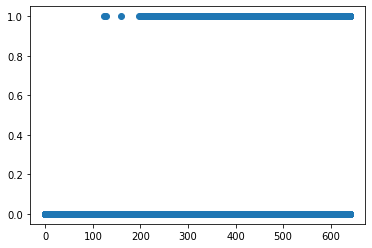

In [47]:
# import sklearn

x1 = [
    sim1(image[:i], image[i:])
    for image in data.images
    for i in range(1, image.shape[0])
]

x11 = [
    sim1(image1[:i], image2[np.random.randint(0, image2.shape[0]):])
    for image1 in data.images
    for image2 in np.random.permutation(data.images)
    for i in range(1, image1.shape[0])
]

x2 = [
    sim2(image[:, :i], image[:, i:])
    for image in data.images
    for i in range(1, image.shape[1])
]

plt.scatter(x1 + x11, [1]*len(x1) + [0]*len(x11))

In [2]:
from pyqubo import Array, Constraint, Placeholder, solve_qubo

In [16]:
cols = 5
rows = 1
n = cols*rows

In [19]:
x = Array.create('x', shape=(n, rows, cols), vartype='BINARY')
coeff = Placeholder('C')

In [14]:
constraints = []
for i in range(5):
    _ = sum(x[:, i, :]) - 1
    constraints.append(Constraint(sum(_*_), f'c1_{i}'))

for i in range(2):
    _ = sum(x[:, :, i]) - 1
    constraints.append(Constraint(sum(_*_), f'c2_{i}'))

In [18]:
Placeholder

Docstring:      <no docstring>
Init docstring: __init__(self: cpp_pyqubo.Placeholder, label: str) -> None
File:           ~/.cache/pypoetry/virtualenvs/streamlit-test-kTJ19tA2-py3.8/lib/python3.8/site-packages/cpp_pyqubo.cpython-38-x86_64-linux-gnu.so
Type:           pybind11_type
Subclasses:     
